In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import os
import time
import sys
import pprint

In [2]:
df = pd.read_csv("application_train.csv")

In [3]:
print(df.columns.values)

['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOOR

In [4]:
df.shape

(307511, 122)

In [5]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [6]:
df.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
5        -16941
6        -13778
7        -18850
8        -20099
9        -14469
10       -10197
11       -20417
12       -13439
13       -14086
14       -14583
15        -8728
16       -12931
17        -9776
18       -17718
19       -11348
20       -18252
21       -14815
22       -11146
23       -24827
24       -11286
25       -19334
26       -18724
27       -15948
28        -9994
29       -10341
          ...  
307481   -20644
307482   -14106
307483   -24911
307484   -12847
307485   -11973
307486   -16010
307487   -23125
307488   -10092
307489   -16471
307490    -9874
307491   -10976
307492   -20965
307493   -17533
307494   -14958
307495   -20922
307496   -17345
307497   -16679
307498   -19102
307499   -16988
307500   -20390
307501   -12961
307502   -16063
307503   -11870
307504   -16705
307505   -24384
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length

In [7]:
def convertAge(age):
    age = int((age - (age * 2))/365)
    return age
# df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(convertAge)

In [8]:
df['AGE'] = df['DAYS_BIRTH'].apply(convertAge)

In [9]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [10]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,43.435968
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,11.954593
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


### 1. Exploration and Data Cleansing
##### PassengerID is not usable for machine leanin. Same with Name. Let's drop these.

In [11]:
df.drop(["FLAG_PHONE", "FLAG_EMAIL", "SK_ID_CURR"], inplace=True, axis=1)

In [12]:
df.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52


#not necessary
df.dtypes.reset_index(inplace=True)

In [13]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54


In [14]:
cat_cols = [
    "AMT_INCOME_TOTAL",
    "CODE_GENDER",
    "NAME_INCOME_TYPE",
    "AGE"
]

In [15]:
num_cols = [
    
    "CNT_FAM_MEMBERS",
    "CNT_CHILDREN",
    "DAYS_ID_PUBLISH",
    "DAYS_EMPLOYED",
    "FLAG_EMP_PHONE",
    "CNT_FAM_MEMBERS",
   
    "DAYS_REGISTRATION"
]

In [16]:
for col in cat_cols:
    print(col, len(df.loc[df[col].isna()]))

AMT_INCOME_TOTAL 0
CODE_GENDER 0
NAME_INCOME_TYPE 0
AGE 0


In [17]:
del df["AMT_GOODS_PRICE"]

In [18]:
cat_cols = [
    "FLAG_DOCUMENT_2",
    "FLAG_DOCUMENT_3",
    "FLAG_DOCUMENT_4",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_5",
    "FLAG_DOCUMENT_6",
    "FLAG_DOCUMENT_7",
    "FLAG_DOCUMENT_8",
    "FLAG_DOCUMENT_9",
    "FLAG_DOCUMENT_10"
]

In [19]:
for col in cat_cols:
    print(col, len(df.loc[df[col].isna()]))

FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMENT_6 0
FLAG_DOCUMENT_7 0
FLAG_DOCUMENT_8 0
FLAG_DOCUMENT_9 0
FLAG_DOCUMENT_10 0


In [20]:
num_cols = [
    "FLAG_DOCUMENT_11",
    "FLAG_DOCUMENT_12",
    "FLAG_DOCUMENT_13",
    "FLAG_DOCUMENT_14",
    "FLAG_DOCUMENT_15",
    "FLAG_DOCUMENT_16",
    "FLAG_DOCUMENT_17",
    "FLAG_DOCUMENT_18",
    "FLAG_DOCUMENT_19",
    "FLAG_DOCUMENT_20",
    "FLAG_DOCUMENT_21"
]

In [21]:
for col in num_cols:
    print(col, len(df.loc[df[col].isna()]))

FLAG_DOCUMENT_11 0
FLAG_DOCUMENT_12 0
FLAG_DOCUMENT_13 0
FLAG_DOCUMENT_14 0
FLAG_DOCUMENT_15 0
FLAG_DOCUMENT_16 0
FLAG_DOCUMENT_17 0
FLAG_DOCUMENT_18 0
FLAG_DOCUMENT_19 0
FLAG_DOCUMENT_20 0
FLAG_DOCUMENT_21 0


In [22]:
df.groupby("CODE_GENDER").mean()["AGE"]

CODE_GENDER
F      44.710666
M      40.979887
XNA    36.750000
Name: AGE, dtype: float64

In [23]:
  df[df["CODE_GENDER"] != "XNA"] 

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25
1,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,Family,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45
2,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52
3,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52
4,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54
5,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,"Spouse, partner",...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,46
6,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,37
7,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,Unaccompanied,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,51
8,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,Children,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55
9,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,Unaccompanied,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,39


Check percentage of missing data & dropping columns with over 80% missing values

In [24]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [25]:
def missing_over80(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>80]
    print('number of columns has over 80% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [26]:
drop_list = list(missing_over80(df))
len(drop_list)

number of columns has over 80% missing values:  0


0

Check percentage of missing data & dropping columns with over 65% missing values

In [27]:
def missing_over65(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>65]
    print('number of columns has over 65% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [28]:
drop_list = list(missing_over65(df))
len(drop_list)

number of columns has over 65% missing values:  17


17

Check percentage of missing data & dropping columns with over 55% missing values

In [29]:
def missing_over55(file):
    l=[]
    missing_over = missing_data(file)
    #print('file name: ', file)
    m = missing_over.loc[missing_over['Percent']>55]
    print('number of columns has over 55% missing values: ', m.shape[0])
    #print(m.iloc[:,0])
    return m.index

In [30]:
drop_list = list(missing_over55(df))
len(drop_list)

number of columns has over 55% missing values:  27


27

In [31]:
df.shape

(307511, 119)

In [32]:
# test set
test  = pd.read_csv('application_test.csv')

In [33]:
def drop_columns(file):
    print('number of columns before dropping: ', file.shape[1])
    for col in list(missing_over65(file)):
        if col in list(file.columns):
            file = file.drop([col], axis=1)
    print('number of columns left after droping:', file.shape[1])
    return file

In [34]:
df= drop_columns(df)
drop_columns(df).columns

number of columns before dropping:  119
number of columns has over 65% missing values:  17
number of columns left after droping: 102
number of columns before dropping:  102
number of columns has over 65% missing values:  0
number of columns left after droping: 102


Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_TYPE_SUITE',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object', length=102)

In [35]:
drop_columns(df).columns.tolist()

number of columns before dropping:  102
number of columns has over 65% missing values:  0
number of columns left after droping: 102


['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LANDAREA_AVG',
 'LIV

In [44]:
drop_columns(df).shape
new_df = drop_columns(df)

number of columns before dropping:  102
number of columns has over 65% missing values:  0
number of columns left after droping: 102
number of columns before dropping:  102
number of columns has over 65% missing values:  0
number of columns left after droping: 102


In [36]:


for item in drop_list:
    if item in list(test.columns):
        test = test.drop([item], axis=1)
test.shape

(48744, 94)

### Drop dates_employed over 32400 (90 years)

In [45]:
new_df= new_df[new_df['DAYS_EMPLOYED']<32400]

In [46]:


new_df= test[test['DAYS_EMPLOYED']<32400]

In [47]:
new_df['DAYS_EMPLOYED']

0        -2329
1        -4469
2        -4458
3        -1866
4        -2191
5       -12009
6        -2580
7        -1387
8        -1013
9        -2625
11       -3555
12        -929
13       -3578
14       -1830
15       -1007
16       -4739
18       -1883
19        -305
20       -2780
21      -13294
23       -1415
24       -3518
25        -967
27       -2467
28       -1310
29       -2785
30       -2055
31       -1751
32        -270
33       -1397
         ...  
48709    -1411
48710    -4541
48711    -2209
48712    -1122
48713      -94
48714    -1745
48715    -4836
48716    -2283
48718    -4931
48719    -1979
48720     -305
48721    -1309
48722    -1310
48723    -2819
48724    -2191
48725    -3727
48726    -2196
48727    -6551
48729    -1564
48730    -3759
48732    -1896
48733    -3684
48734     -846
48737     -119
48738     -369
48739    -5169
48740    -1149
48741    -3037
48742    -2731
48743     -633
Name: DAYS_EMPLOYED, Length: 39470, dtype: int64

There are a lot of missing values in some of the columns (c. 50% or more). We will need to impute these values for many machine learning algorithms to work, we can consider the imputation method later on once we are ready to preprocess the data before loading into the model. Another option would be to drop rows with lots of missing values, but these could be very important to fitting the model. Likewise we can drop the columns which have a high number of missing values, but the information we do have could still be useful to training a good model. For now it makes sense to keep these columns, and work on imputing or removing features once we are trying to optimise fitting a model later.

In [48]:
new_df.shape

(39470, 94)

### Embededding Neural Networks

In [55]:

col_list = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
            'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
            'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 
            'EMERGENCYSTATE_MODE']

#print(col_list)

def to_cat_col(col):

    

    new_df[col] = new_df[col].cat.codes

    return new_df[col]


In [56]:
# for col in col_list:
#     new_df[col] = new_df[col].astype('category').cat.codes
# #     train_d = to_cat_col(col)
# #     print(train_d[col])
# new_df.dtypes

In [57]:
int_col0 = new_df.select_dtypes(include=['int8']).columns.values.tolist()
int_col0

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Visualising affect on Target variable using Proportion Target Positive plots or Kernal Density Estimation (KDE) plots
In order to help us understand the affect an independent variable is having on our target of default or not default, we should ideally visualise the data. A histogram will be dependent on the underlying distribution of the independent variable, i.e. if there are lots of young people in the dataset, then the positive class may appear to be higher in this group simply because there are more of both classes. There are a couple of ways around this which can help us understand the data better.

In [59]:
# # iterate over float variables and plot KDE
# for column in new_df.loc[:, (new_df.dtypes == np.float64)].columns.values:
#     # do not plot target 
#     if column != 'TARGET':
#         # reverse axis if values are negative
#         if (new_df[column].median() < 0):
#             plot_kde(new_df,column, reverse_scale = True)
#         else:
#             plot_kde(new_df,column)

In [60]:
# # Create function for plotting kde with scale reversing
# def plot_kde(new_df, var, reverse_scale = False):
    
#     plt.figure(figsize = (6, 4))
    
#     if reverse_scale == True:
#         r = -1
#     else:
#         r = 1
    
#     # KDE plot of loans that were repaid on time
#     sns.kdeplot(new_df.loc[new_df['TARGET'] == 0, var] * r, label = 'target: negative class', color = 'grey', shade = True)

#     # KDE plot of loans which were not repaid on time
#     sns.kdeplot(df.loc[new_df['TARGET'] == 1, var] * r, label = 'target: positive class', color = 'cornflowerblue', shade = True)

#     # Labeling of plot
#     plt.xlabel('{}'.format(var)); plt.ylabel('Density'); plt.title('KDE for {}'.format(var));
#     plt.show()
#     plt.close()

# # plot age kde plot
# plot_kde(new_df,'AGE', True)

KeyError: 'TARGET'

<Figure size 432x288 with 0 Axes>

#### Visualising affect on Target variable using Proportion Target Positive plots or Kernal Density Estimation (KDE) plots¶

In [61]:
# # iterate over float variables and plot KDE
# for column in df.loc[:, (df.dtypes == np.float64)].columns.values:
#     # do not plot target 
#     if column != 'TARGET':
#         # reverse axis if values are negative
#         if (df[column].median() < 0):
#             plot_kde(df,column, reverse_scale = True)
#         else:
#             plot_kde(df,column)

In [102]:
new_df.NAME_CONTRACT_TYPE.value_counts()

0    39120
1      350
Name: NAME_CONTRACT_TYPE, dtype: int64

In [103]:
df.NAME_CONTRACT_TYPE.value_counts() / len(new_df)

Cash loans         5.731543
Revolving loans    0.656524
Name: NAME_CONTRACT_TYPE, dtype: float64

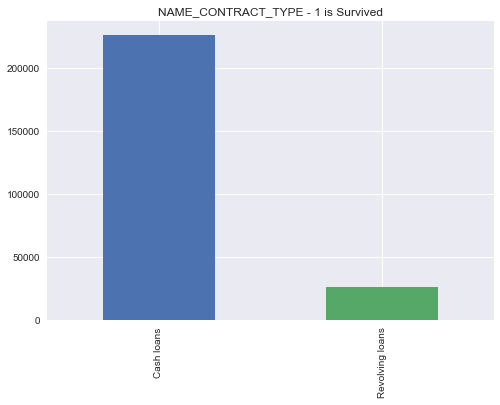

In [104]:
df.NAME_CONTRACT_TYPE.value_counts().plot(kind="bar")
plt.title("NAME_CONTRACT_TYPE - 1 is Survived")
plt.show()

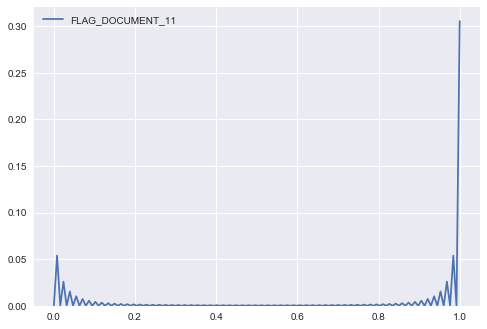

C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vijayalaskmi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


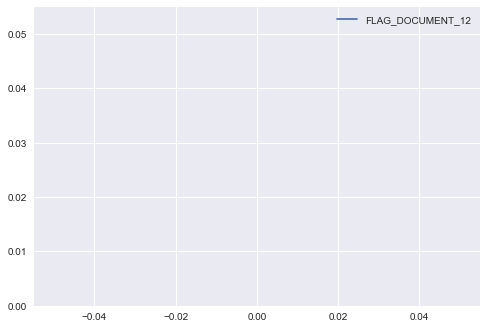

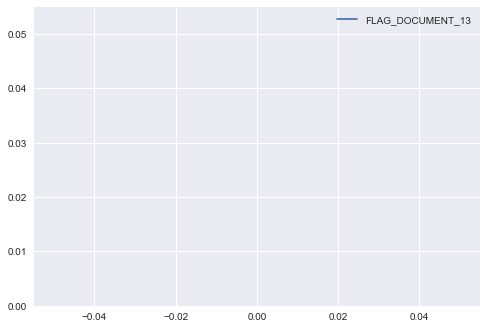

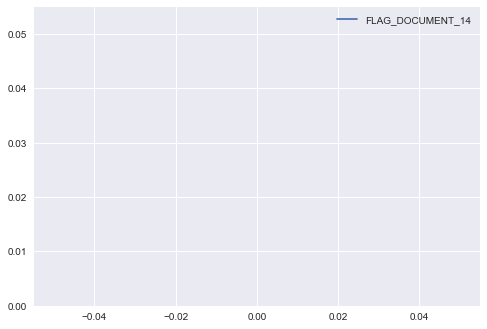

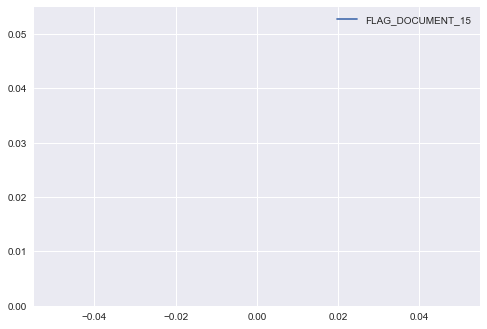

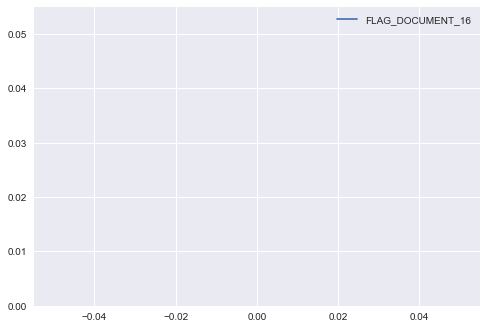

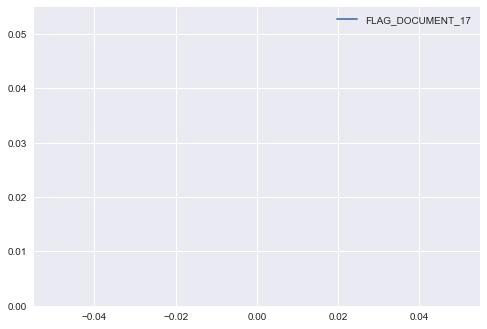

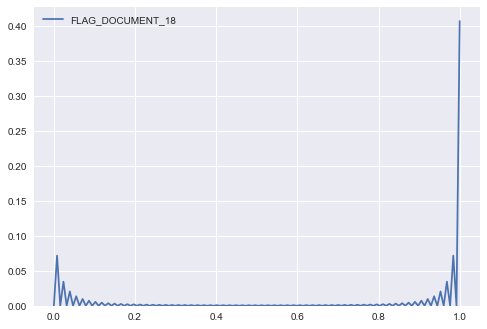

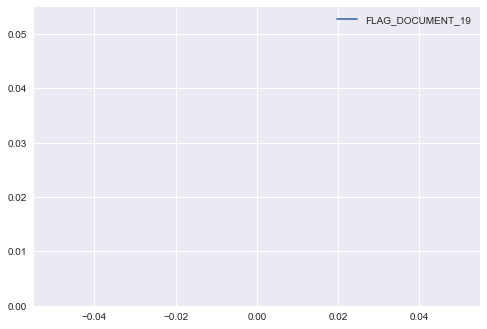

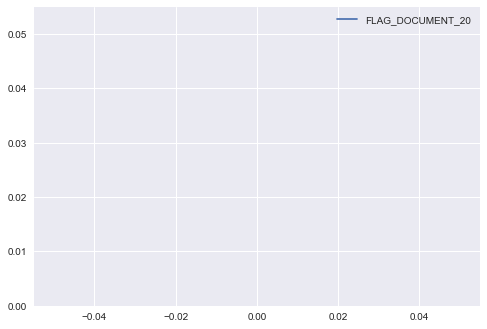

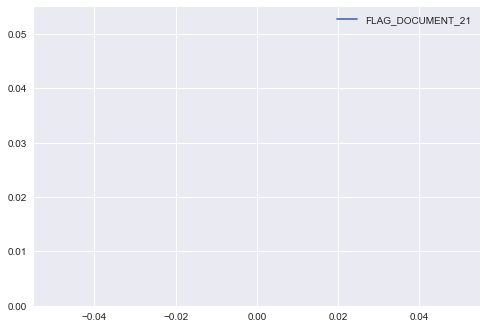

In [105]:
for col in num_cols:
    sns.kdeplot(new_df[col])
    plt.show()

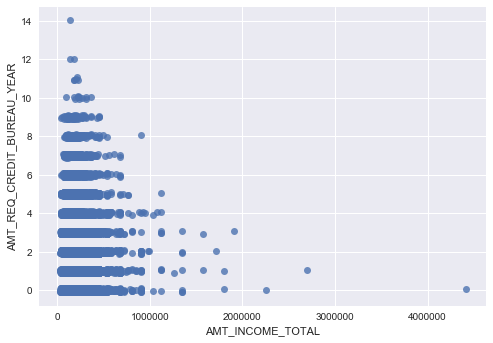

In [106]:
sns.regplot(x="AMT_INCOME_TOTAL", y="AMT_REQ_CREDIT_BUREAU_YEAR", data=new_df, fit_reg=False, y_jitter=0.1)

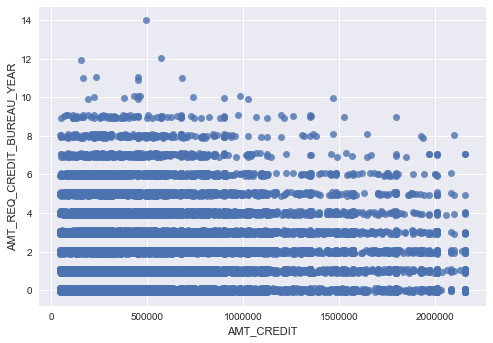

In [107]:
sns.regplot(x="AMT_CREDIT", y="AMT_REQ_CREDIT_BUREAU_YEAR", data=new_df, fit_reg=False, y_jitter=0.1)

In [108]:
# create dict object from columns and datatypes
columns = new_df.columns.to_series().groupby(new_df.dtypes).groups
for key in columns.keys():
    print('\nData Type {} Columns:'.format(key))
    print(list(columns[key]))


Data Type int8 Columns:
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Data Type int64 Columns:
['SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT

In [110]:
# desribe the categorical data
# new_df.loc[:, new_df.dtypes == np.object].describe()

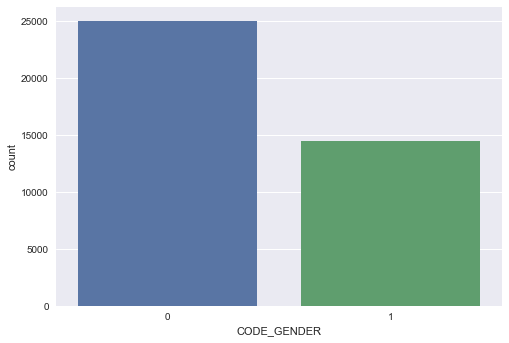

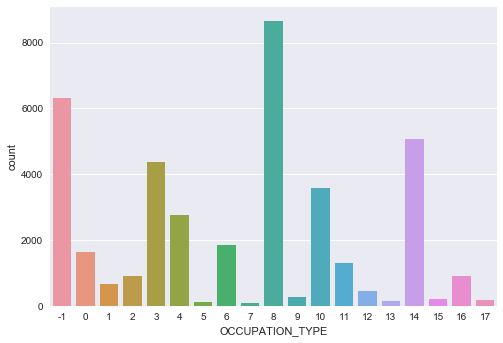

In [111]:
cat_cols = [
    "CODE_GENDER",
    "OCCUPATION_TYPE"
]

for col in cat_cols:
    sns.countplot(col, data=new_df)
    plt.show()

In [112]:
plt.style.use("seaborn")

In [113]:
plt.show()

In [114]:
# iterate over np.object columns and plot
for column in new_df.loc[:, new_df.dtypes == np.object].columns.values:
    categorical_plot(new_df, column)

In [115]:
# Create function for plotting kde with scale reversing
def plot_kde(new_df, var, reverse_scale = False):
    
    plt.figure(figsize = (12, 6))
    
    if reverse_scale == True:
        r = -1
    else:
        r = 1
    
    # KDE plot of loans that were repaid on time
    sns.kdeplot(new_df.loc[new_df['TARGET'] == 0, var] * r, label = 'target: negative class', color = 'grey', shade = True)

    # KDE plot of loans which were not repaid on time
    sns.kdeplot(new_df.loc[new_df['TARGET'] == 1, var] * r, label = 'target: positive class', color = 'cornflowerblue', shade = True)

    # Labeling of plot
    plt.xlabel('{}'.format(var)); plt.ylabel('Density'); plt.title('KDE for {}'.format(var));
    plt.show()
    plt.close()

# plot age kde plot








plot_kde(new_df,'AGE', True)

KeyError: 'TARGET'

<Figure size 864x432 with 0 Axes>

### MORE EDA 

STILL LOOKING FOR CATEGORICAL VARIABLES AD TRENDS 

In [116]:
# define function for plotting categorical bubble charts for remaining variables
def categorical_plot(new_df, variable):
    
    plt.figure(figsize = (6, 4))
    
    new_df_high = df[df['TARGET'] == 1].groupby(variable)['TARGET'].agg('count')
    new_df_var = df.groupby(variable)['TARGET'].agg('count')
    categorical = new_df_high.divide(new_df_var, fill_value = 0) * 100

    # Convert back to df
    df_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

    # Create plot in Plotly for interactive visualisation (with some Starling colours)
    ax = df_categorical.plot(x = variable, y = 'TARGET', kind = 'kde', figsize=(6,4), color = 'red')
    ax.set_xlabel('Target: Positive %')
    ax.set_ylabel(variable)
    plt.title('% postive plot for {}'.format(variable.lower()));
    plt.show()
    plt.close()

In [117]:
# # iterate over np.object columns and plot
# for column in new_df.loc[:, new_df.dtypes == np.object].columns.values:
#     categorical_plot(new_df, column)

In [118]:
# Find correlations with the target(takes a while due to many features)
correlations = new_df.corr()['TARGET'].sort_values()

KeyError: 'TARGET'

In [ ]:
# print ordered list of correlations
print('Most Positive Correlations:\n')
print(correlations.sort_values(ascending = False).head(16))
print('\nMost Negative Correlations:\n')
print(correlations.head(15))